In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
air= pd.read_csv('Air Passengers.csv')

In [4]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
#air['Month']= air['Month'].apply(lambda x: pd.Period(x,'D'))

In [6]:
#air['Month']

In [7]:
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
air.isna().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
air.dtypes

Month          object
#Passengers     int64
dtype: object

In [10]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

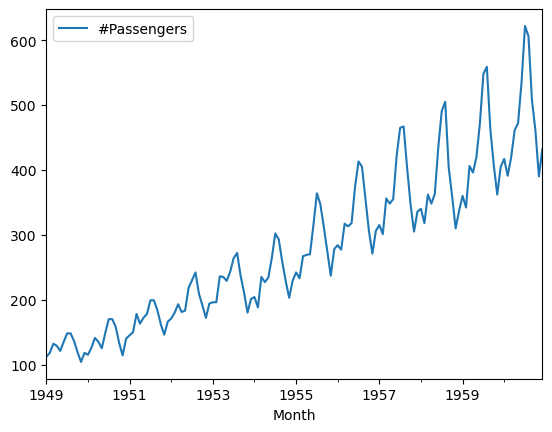

In [11]:
air.set_index('Month',inplace=True)
air.index= pd.to_datetime(air.index)
air.dropna(inplace=True)
air.plot()
air.index


In [12]:
air['#Passengers'].unique()

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271, 301, 356, 348, 422, 465, 467, 404, 305, 336, 340, 362,
       363, 435, 491, 505, 359, 310, 337, 360, 342, 406, 396, 420, 472,
       548, 559, 463, 407, 417, 391, 419, 461, 535, 622, 606, 508, 390,
       432], dtype=int64)

In [13]:
result= seasonal_decompose(air['#Passengers'],model='multiplicative')

<Axes: xlabel='Month'>

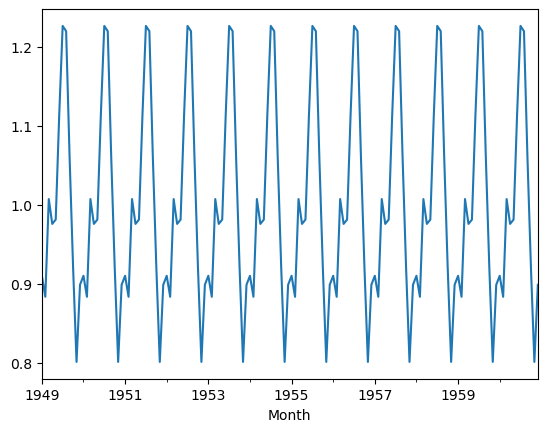

In [14]:
result.seasonal.plot()

<Axes: xlabel='Month'>

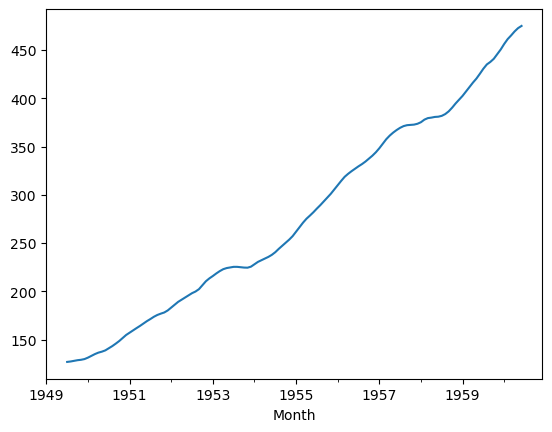

In [15]:
result.trend.plot()

<Axes: xlabel='Month'>

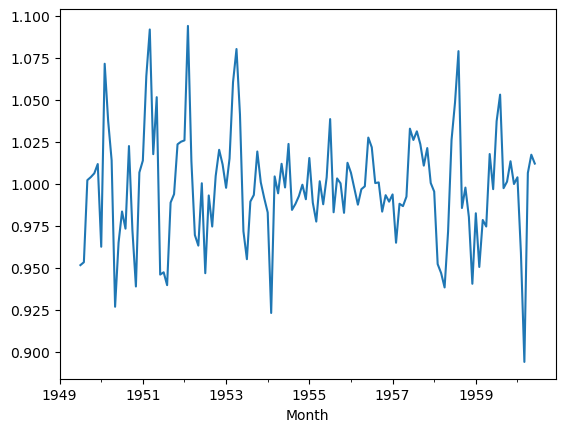

In [16]:
result.resid.plot()

In [17]:
ts_data= air['#Passengers']

In [18]:
ts_data_log= np.log(ts_data)

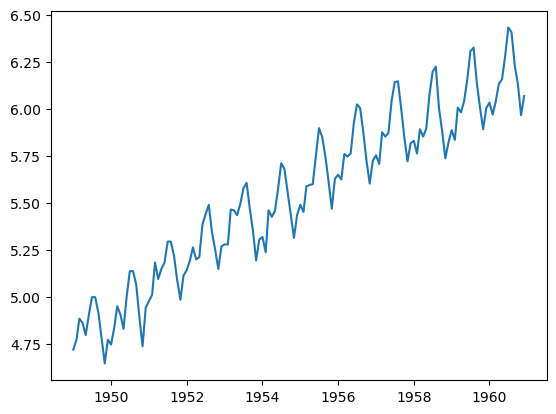

In [19]:
plt.plot(ts_data_log)

In [20]:
def test_stationarity(timeseries):
    
    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')
    
    
    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


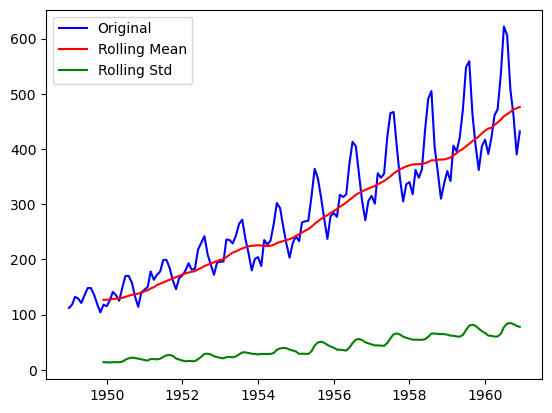

In [21]:
test_stationarity(air['#Passengers'])

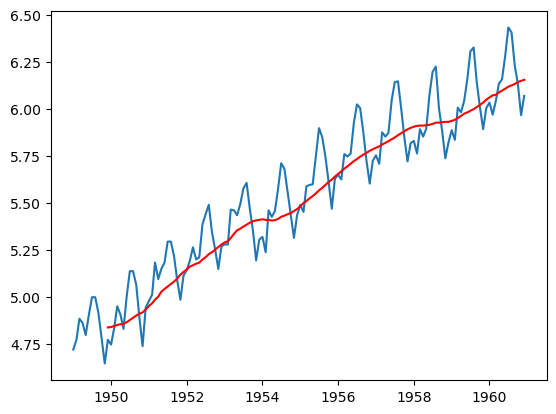

In [22]:
movingAverage = ts_data_log.rolling(window = 12).mean()
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [23]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [24]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

Results of Dickey-Fuller Test :

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


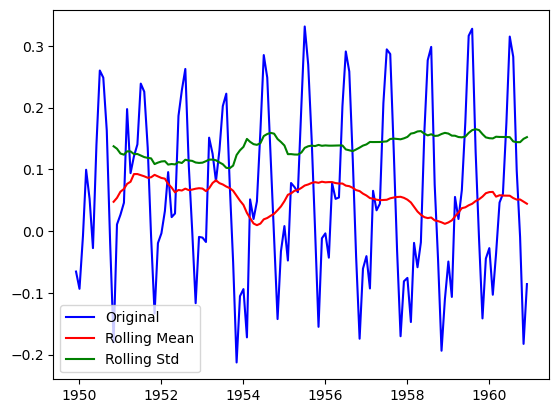

In [25]:
test_stationarity(ts_data_log_diff)

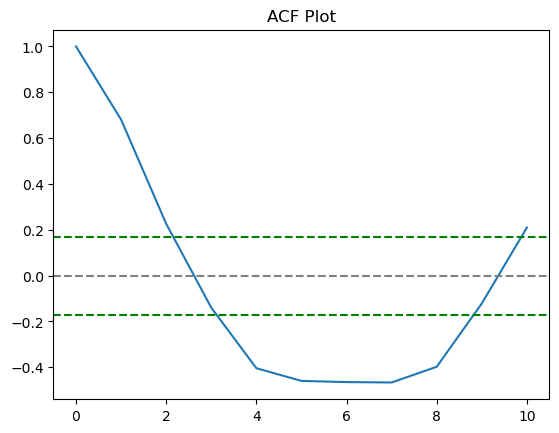

In [51]:
# Plotting the ACF curve

plt.plot(np.arange(0,11), acf(ts_data_log_diff, nlags = 10))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

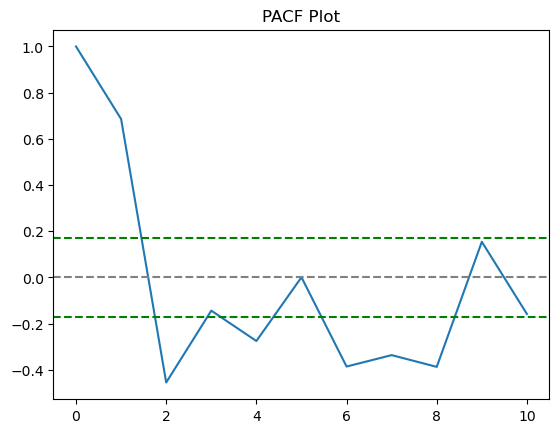

In [52]:
# Plotting the PACF curve

plt.plot(np.arange(0,11), pacf(ts_data_log_diff, nlags = 10))
plt.axhline(y=0, linestyle = '--', color = 'gray')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [31]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [37]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(ts_data_log, order=(2,2,2))

C:\Users\excel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\excel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\excel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
results = model.fit()


C:\Users\excel\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


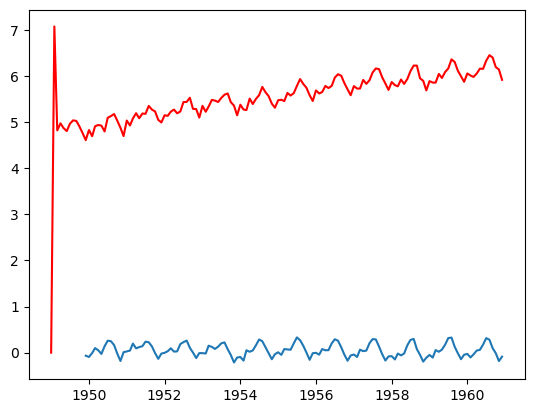

In [39]:
plt.plot(ts_data_log_diff)
plt.plot(results.fittedvalues,color='red')
plt.show()

In [ ]:
  df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

In [58]:
df_test = adfuller(air['#Passengers'])


In [59]:
df_test

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [26]:
len(ts_data_log_diff)

133